<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './data/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [3]:
# A: 
df = pd.read_csv(sac_csv)

In [4]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [6]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [7]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [9]:
df.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
GRANITE BAY          3
POLLOCK PINES        3
WEST SACRAMENTO      3
LOOMIS               2
EL DORADO            2
GREENWOOD            1
PENRYN               1
GARDEN VALLEY        1
MEADOW VISTA         1
FORESTHILL           1
SHINGLE SPRINGS      1
WALNUT GROVE         1
COOL                 1
SLOUGHHOUSE          1
MATHER               1
DIAMOND SPRINGS      1
Name: city, dtype: int64

In [10]:
df[df['beds'] ==0].shape

(108, 12)

In [11]:
df[df['sq__ft']<=0].shape

(172, 12)

In [12]:
df[df['price']<=0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [13]:
df.drop(703, inplace= True)

In [14]:
df1=df[df['sq__ft'] !=0]

In [15]:
#df1.shape
df1.sample(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
77,391 NATALINO CIR,SACRAMENTO,95835,CA,2,2,1341,Residential,Wed May 21 00:00:00 EDT 2008,221000,38.673070,-121.506373
218,8907 GEMWOOD WAY,ELK GROVE,95758,CA,3,2,1555,Residential,Tue May 20 00:00:00 EDT 2008,185000,38.435471,-121.441173
123,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214
425,8165 AYN RAND CT,SACRAMENTO,95828,CA,4,3,1940,Residential,Mon May 19 00:00:00 EDT 2008,208000,38.468639,-121.403265
448,8721 SPRUCE RIDGE WAY,ANTELOPE,95843,CA,3,2,1187,Residential,Mon May 19 00:00:00 EDT 2008,234000,38.727657,-121.391028
183,2505 RHINE WAY,ELVERTA,95626,CA,3,2,1080,Residential,Tue May 20 00:00:00 EDT 2008,126000,38.717976,-121.407684
904,8632 PRAIRIEWOODS DR,SACRAMENTO,95828,CA,3,2,1543,Residential,Thu May 15 00:00:00 EDT 2008,145846,38.477563,-121.384382
631,6548 GRAYLOCK LN,NORTH HIGHLANDS,95660,CA,3,2,1272,Residential,Fri May 16 00:00:00 EDT 2008,124413,38.686061,-121.369949
61,306 CAMELLIA WAY,GALT,95632,CA,3,2,1130,Residential,Wed May 21 00:00:00 EDT 2008,182750,38.260443,-121.297864
66,7005 TIANT WAY,ELK GROVE,95758,CA,3,2,1586,Residential,Wed May 21 00:00:00 EDT 2008,194000,38.422811,-121.423285


df1=df.dropna(subset=['sq__ft'])

df1.sample(10)

In [16]:
df1[df1['sq__ft']<=0].shape

(0, 12)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

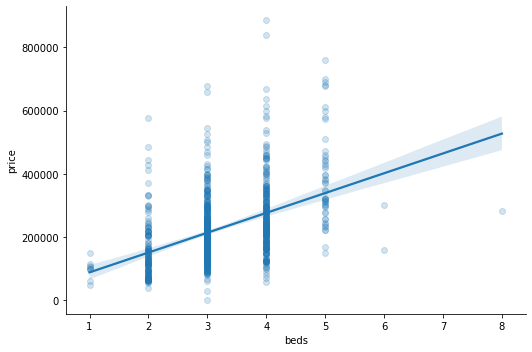

In [17]:
# A
sns.lmplot(x='beds', y='price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});


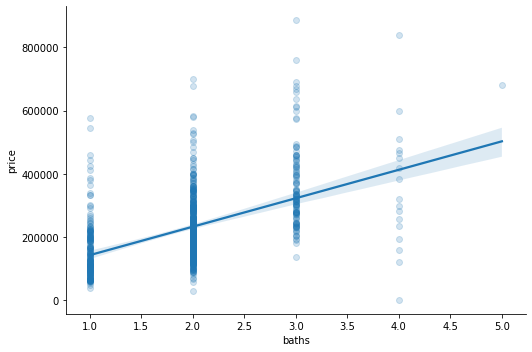

In [18]:
sns.lmplot(x='baths', y='price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});

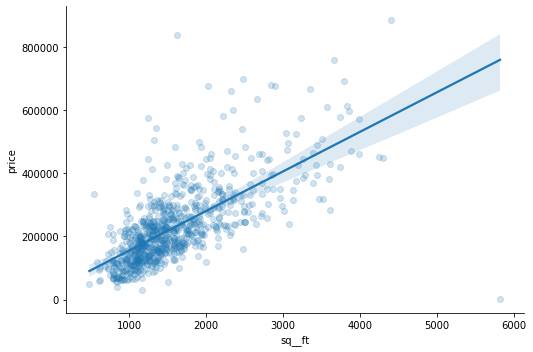

In [19]:
sns.lmplot(x='sq__ft', y='price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});

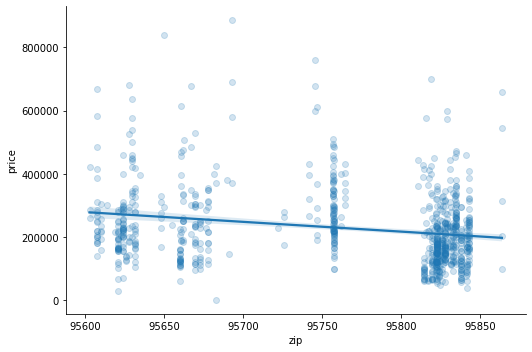

In [20]:
#plt.scatter(df3.price, df3.city )
#plt.title('pricey location by zip')

sns.lmplot(x='zip', y='price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2});

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [21]:
# A:
#Sqft vs Price is a best predictor 

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [22]:
# A:

from statistics import mean
xs = df1['sq__ft'].values
ys = df1['price'].values

def slope_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /((mean(xs)**2) - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m,b


### 6. Interpret the intercept. Interpret the slope.

In [23]:
# A:     
m, b = slope_intercept(xs,ys)
print(m,b)

#Meaning for a single value of change in intercept, sq__ft,there is an approximate change of $125 in slope, price

124.9733723937762 30638.36452150205


### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [24]:
# A:


### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [31]:
# A:
y_pred = []

for x in df1['sq__ft']:
    y = 30638.36 + (124.97*x)
    y_pred.append(y)


df1[df1.Pred == y_pred]


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Pred
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,135113.28
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,176478.35
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,130114.48
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,137112.80
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,130239.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,315569.96
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,215219.05
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,182601.88
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,241212.81


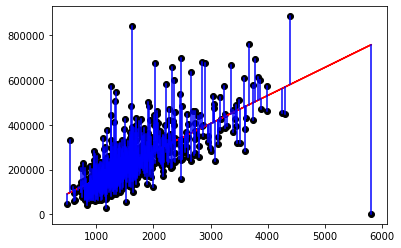

In [32]:

ax = plt.gca()
ax.scatter(x= df1['sq__ft'], y=df1['price'], c='k')
ax.plot(df1['sq__ft'], df1['Pred'], color='r');

for _, row in df1.iterrows():
        plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Pred']), 'b-')

